<a href="https://colab.research.google.com/github/thisismedha/CNN/blob/main/EmotionDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchaudio
!pip install librosa
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=ba33e98d996fa38f0b12013f9b2cd3367ffb86242790a821272e75440ed63cce
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd # to play audio in the notebook
import os
import sys
import warnings

In [3]:
if not sys.warnoptions:
    warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
TESS = "/content/drive/MyDrive/MIS548/EmotionDetector/TESS Toronto emotional speech set data/"

# Run one example 
dir_list = os.listdir(TESS)
dir_list[0:5]

['YAF_neutral',
 'YAF_fear',
 'YAF_disgust',
 'OAF_Pleasant_surprise',
 'YAF_angry']

In [5]:
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [6]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')  
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.head()

,labels,source,path
0,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
1,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
2,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
3,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
4,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...


In [7]:
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

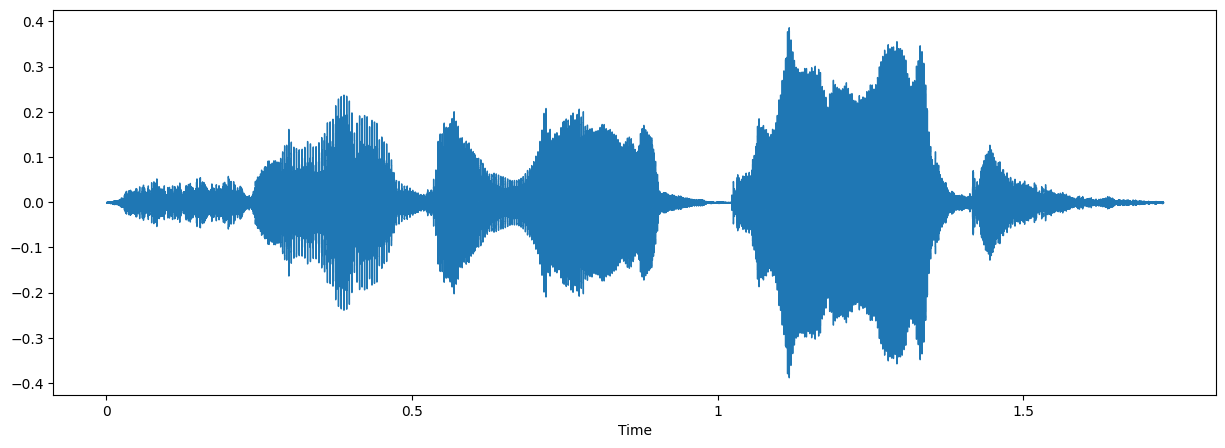

In [9]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

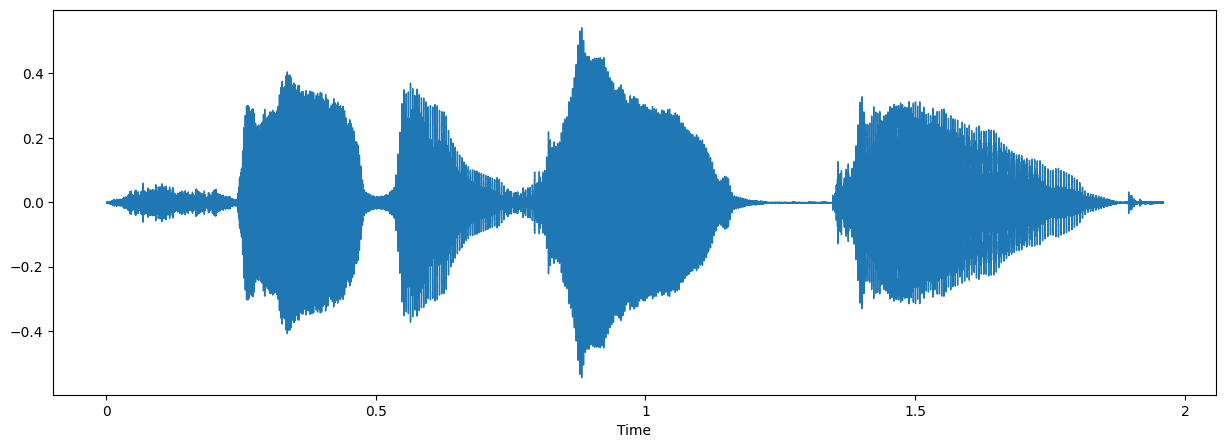

In [ ]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [10]:
!pip install llvmlite
!pip uninstall resampy
!pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "unistall" - maybe you meant "uninstall"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.9 MB/s eta 0:00:00


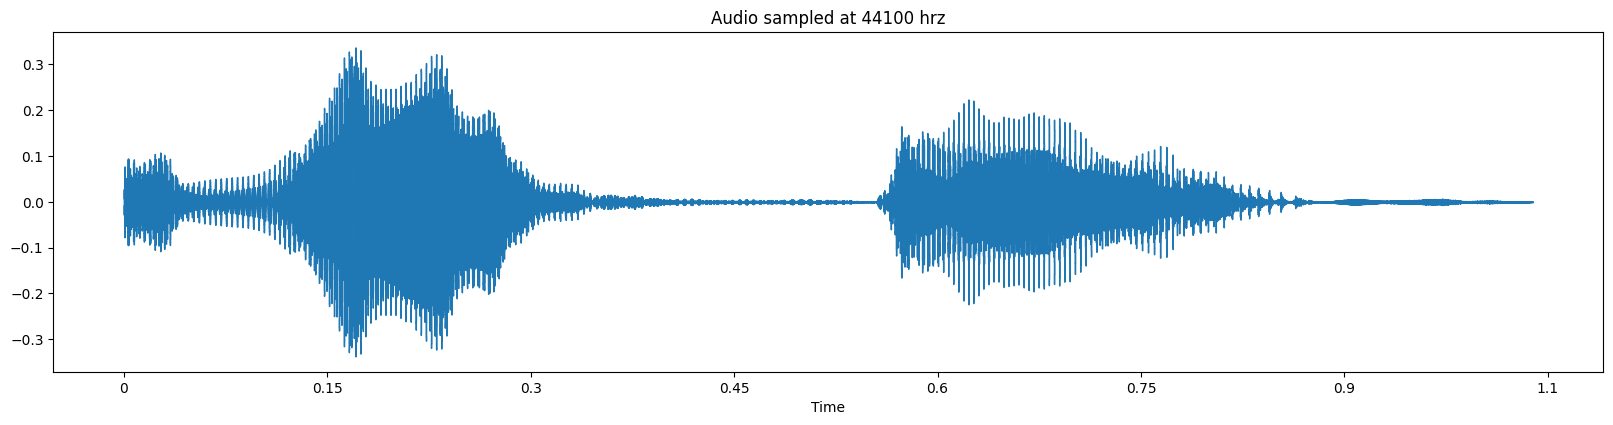

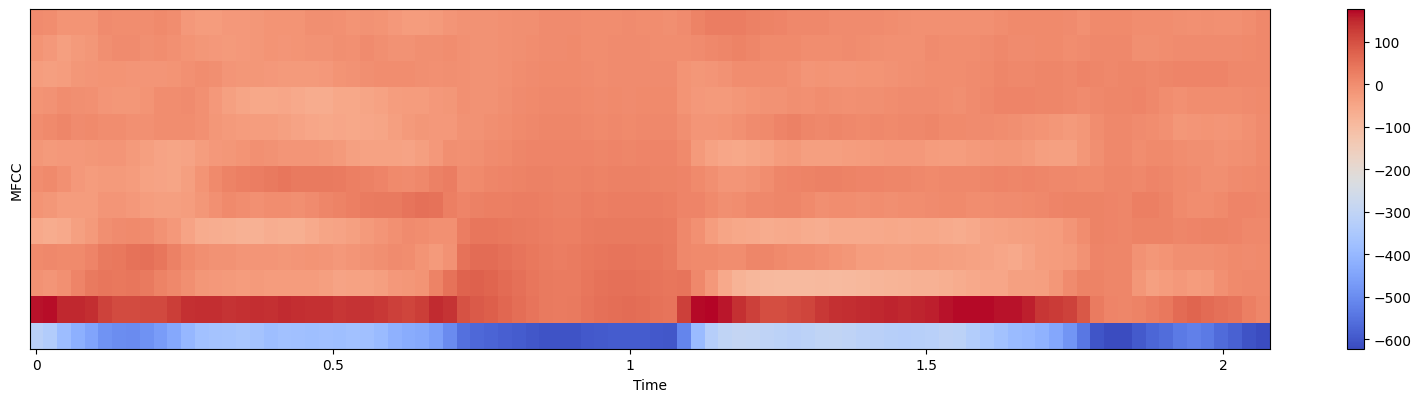

In [8]:
# Source - TESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/MIS548/EmotionDetector/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


130
178


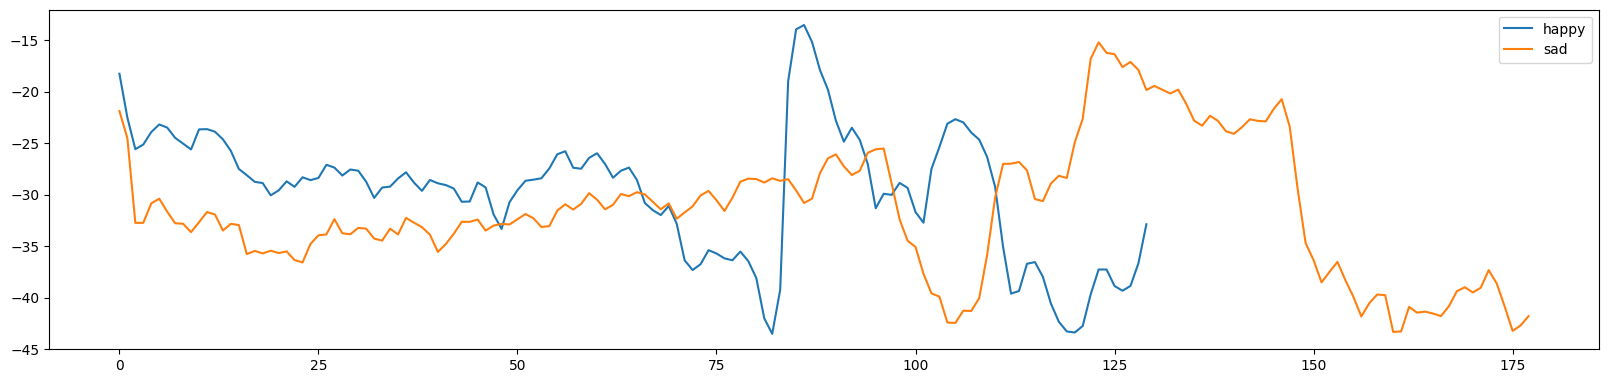

In [9]:
# Lets fine happy and sad feature difference
# Source - TESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/MIS548/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
happy = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
happy = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(happy))

# Source - TESS; Gender - Male; Emotion - Angry 
path = "/content/drive/MyDrive/MIS548/TESS Toronto emotional speech set data/OAF_Sad/OAF_back_sad.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
sad = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
sad = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(sad))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(happy, label='happy')
plt.plot(sad, label='sad')
plt.legend()

100
117


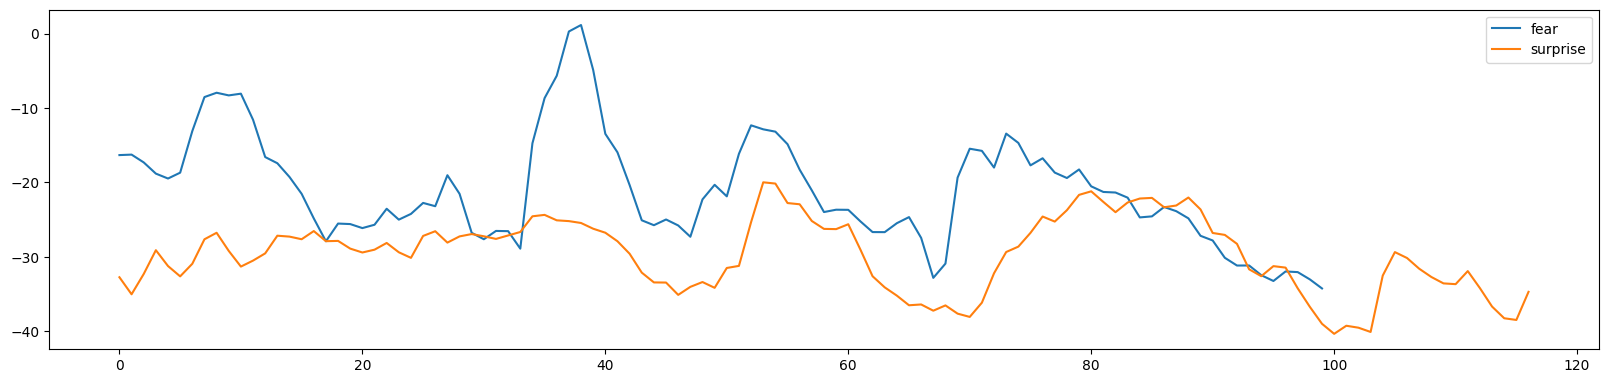

In [10]:
# Lets fine happy and sad feature difference
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/MIS548/TESS Toronto emotional speech set data/YAF_fear/YAF_back_fear.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
fear = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
fear = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(fear))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/content/drive/MyDrive/MIS548/EmotionDetector/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_back_ps.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
surprise = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
surprise = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(surprise))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(fear, label='fear')
plt.plot(surprise, label='surprise')
plt.legend()

In [ ]:
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [11]:
# Importing required libraries 
# Keras
import tensorflow as tf
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import optimizers
# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
# save metadata
# TESS_df.head()
# save the DataFrame as a CSV file
TESS_df.to_csv('metadata.csv', index=False)

In [15]:
#@title Default title text
ref = pd.read_csv("/content/metadata.csv")
ref.head()

,labels,source,path
0,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
1,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
2,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
3,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...
4,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...


# Data Preprocessing
Read each audio file, extract its mean across all MfCC bands by time, 
and just keep the extracted features, dropping the entire audio file data.

In [16]:
# data preprocessing 
# read each audio file, extract its mean across all MfCC bands by time, 
# and just keep the extracted features, dropping the entire audio file data.
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean of the features, Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

2800


,feature
0,"[-16.43542, -18.92822, -27.777752, -29.4795, -..."
1,"[-17.2642, -20.490538, -27.274363, -27.431368,..."
2,"[-15.178964, -19.158278, -30.261549, -34.87481..."
3,"[-13.883277, -17.660717, -28.182253, -27.95099..."
4,"[-19.315275, -21.043997, -31.39222, -32.93976,..."


In [17]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,205,206,207,208,209,210,211,212,213,214
0,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-16.435419,-18.928221,-27.777752,-29.479500,-30.187244,-30.003984,-27.896746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-17.264200,-20.490538,-27.274363,-27.431368,-30.397902,-30.416281,-30.318539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-15.178964,-19.158278,-30.261549,-34.874809,-34.856846,-33.898533,-31.691528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-13.883277,-17.660717,-28.182253,-27.950991,-28.975037,-28.827761,-27.006195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-19.315275,-21.043997,-31.392220,-32.939758,-27.945141,-28.922569,-30.557852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(2800, 218)


,labels,source,path,0,1,2,3,4,5,6,...,205,206,207,208,209,210,211,212,213,214
0,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-16.435419,-18.928221,-27.777752,-29.479500,-30.187244,-30.003984,-27.896746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-17.264200,-20.490538,-27.274363,-27.431368,-30.397902,-30.416281,-30.318539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-15.178964,-19.158278,-30.261549,-34.874809,-34.856846,-33.898533,-31.691528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-13.883277,-17.660717,-28.182253,-27.950991,-28.975037,-28.827761,-27.006195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-19.315275,-21.043997,-31.392220,-32.939758,-27.945141,-28.922569,-30.557852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# truncate columns after label column
df = df.iloc[:, :10]
df

,labels,source,path,0,1,2,3,4,5,6
0,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-16.435419,-18.928221,-27.777752,-29.479500,-30.187244,-30.003984,-27.896746
1,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-17.264200,-20.490538,-27.274363,-27.431368,-30.397902,-30.416281,-30.318539
2,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-15.178964,-19.158278,-30.261549,-34.874809,-34.856846,-33.898533,-31.691528
3,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-13.883277,-17.660717,-28.182253,-27.950991,-28.975037,-28.827761,-27.006195
4,female_fear,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-19.315275,-21.043997,-31.392220,-32.939758,-27.945141,-28.922569,-30.557852
...,...,...,...,...,...,...,...,...,...,...
2795,female_sad,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-16.617596,-19.063950,-28.386200,-27.253950,-28.042349,-27.384909,-27.023067
2796,female_sad,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-9.420051,-14.315876,-28.663353,-27.785187,-28.742331,-28.305218,-29.085896
2797,female_sad,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-15.503607,-18.943548,-24.994427,-24.650627,-26.141462,-25.772655,-25.774822
2798,female_sad,TESS,/content/drive/MyDrive/MIS548/EmotionDetector/...,-8.939458,-13.455706,-26.001446,-24.658152,-23.354696,-22.874725,-23.062086


In [20]:
# split the data into 2 parts
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6
1103,-25.077969,-27.368309,-33.838593,-34.663605,-37.359325,-35.711502,-29.347363
1380,-17.465065,-19.576300,-27.255033,-27.799742,-28.905355,-28.761211,-27.378542
344,-19.438826,-21.453285,-29.981030,-26.941507,-24.563545,-22.972361,-24.457745
839,-23.462040,-23.596331,-29.951359,-32.635799,-32.801598,-30.410255,-28.438782
2448,-27.178143,-28.955080,-35.232380,-35.142380,-35.308109,-30.127651,-25.959614
2286,-12.278730,-14.031953,-21.719362,-22.764456,-23.061939,-22.230854,-22.614239
1743,-19.879311,-22.624043,-32.396996,-34.684643,-32.343254,-32.027531,-33.051754
647,-18.923260,-22.837212,-29.905781,-27.842510,-28.019779,-28.657850,-28.735537
2463,-23.083700,-26.170641,-32.812851,-36.238834,-33.330173,-27.037746,-23.685110
1292,-19.803780,-21.673677,-30.800323,-30.675680,-30.150286,-30.144419,-28.577158


In [21]:
# normalise the data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6
1103,-1.288520,-1.370128,-1.119225,-1.273498,-1.820063,-1.494991,-0.239528
1380,0.092372,0.220523,0.278410,0.140566,-0.105641,-0.099079,0.153476
344,-0.265645,-0.162643,-0.300296,0.317376,0.774856,1.063567,0.736508
839,-0.995409,-0.600121,-0.293997,-0.855738,-0.895779,-0.430277,-0.058162
2448,-1.669467,-1.694050,-1.415114,-1.372133,-1.404087,-0.373518,0.436714
2286,1.033112,1.352339,1.453587,1.177914,1.079374,1.212493,1.104498
1743,-0.345544,-0.401640,-0.813186,-1.277832,-0.802830,-0.755094,-0.978976
647,-0.172128,-0.445156,-0.284321,0.131755,0.073949,-0.078320,-0.117399
2463,-0.926783,-1.125638,-0.901468,-1.598020,-1.002972,0.247066,0.890737
1292,-0.331844,-0.207633,-0.474225,-0.451923,-0.358107,-0.376885,-0.085784


In [22]:
y_test[15:25]
# assume y_train is a 2D array of shape (2100, 7)
#y_train_1d = y_train[15:25].flatten()
#print(y_train_1d)

457          female_sad
679        female_angry
2633         female_sad
321     female_surprise
1099       female_happy
1370     female_neutral
1532       female_angry
402          female_sad
1349     female_neutral
700        female_angry
Name: labels, dtype: object

In [23]:
#  convert the data format to a numpy array
# Lets few preparation steps to get it into the correct format for Keras 
import pickle

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(2100, 7)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise']


In [24]:
# expand dimension for CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(2100, 7, 1)

# Baseline Model

In [25]:
# Baseline model
model = Sequential()
model.add(Conv1D(256, 3, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) # Target class number
model.add(Activation('softmax'))

#let's check summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 256)            1024      
                                                                 
 activation (Activation)     (None, 7, 256)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 256)            196864    
                                                                 
 batch_normalization (BatchN  (None, 7, 256)           1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 7, 256)            0         
                                                                 
 dropout (Dropout)           (None, 7, 256)            0         
                                                        

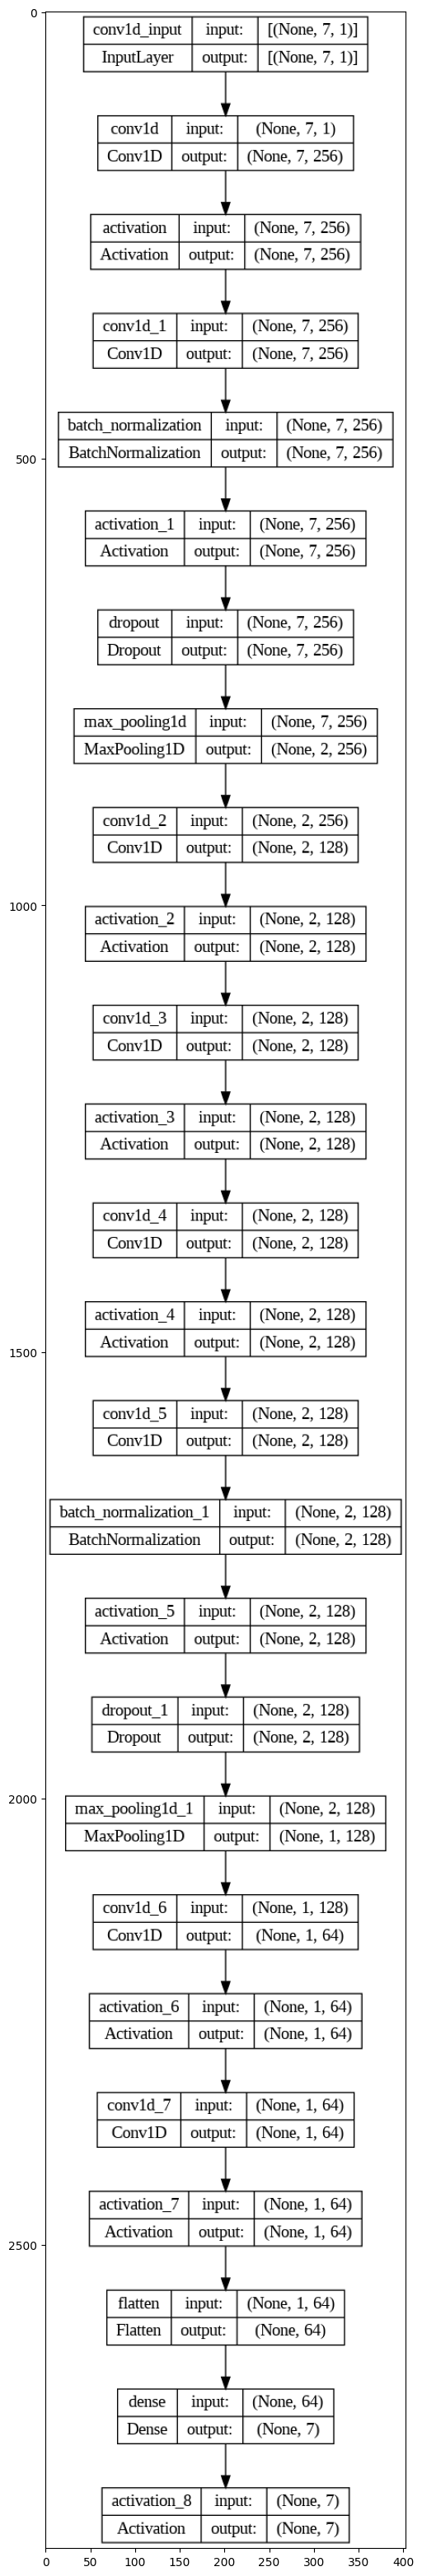

In [33]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# plot the model architecture and save it to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# display the image using matplotlib
img = plt.imread('model_plot.png')
plt.figure(figsize=(40,40))
plt.imshow(img)
plt.show()

In [34]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)#lr=0.00001, decay=1e-6
#model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [35]:
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
132/132 [==============================] - 15s 13ms/step - loss: 1.9271 - accuracy: 0.1605 - val_loss: 1.9442 - val_accuracy: 0.1400
Epoch 2/100
132/132 [==============================] - 1s 8ms/step - loss: 1.8789 - accuracy: 0.1967 - val_loss: 1.9364 - val_accuracy: 0.1700
Epoch 3/100
132/132 [==============================] - 1s 8ms/step - loss: 1.8421 - accuracy: 0.2305 - val_loss: 1.9082 - val_accuracy: 0.2657
Epoch 4/100
132/132 [==============================] - 1s 8ms/step - loss: 1.8165 - accuracy: 0.2795 - val_loss: 1.8530 - val_accuracy: 0.3500
Epoch 5/100
132/132 [==============================] - 1s 9ms/step - loss: 1.7968 - accuracy: 0.3019 - val_loss: 1.7954 - val_accuracy: 0.3786
Epoch 6/100
132/132 [==============================] - 1s 9ms/step - loss: 1.7739 - accuracy: 0.3314 - val_loss: 1.7609 - val_accuracy: 0.3929
Epoch 7/100
132/132 [==============================] - 2s 12ms/step - loss: 1.7509 - accuracy: 0.3567 - val_loss: 1.7355 - val_accuracy: 0.4

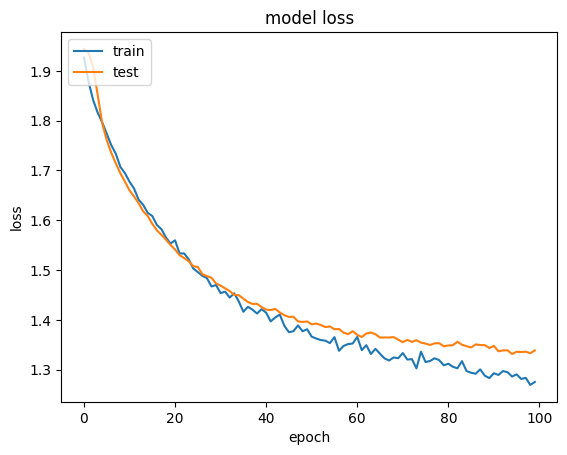

In [36]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

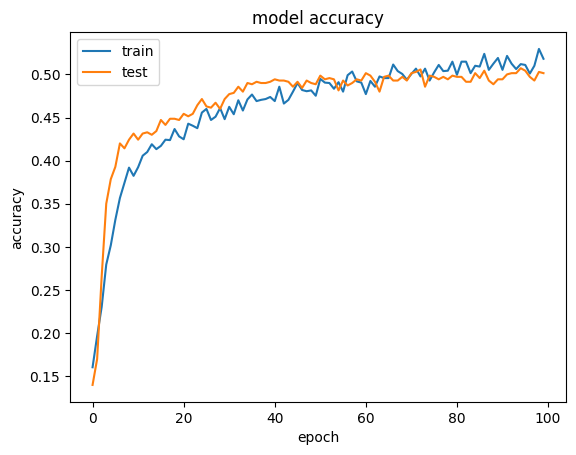

In [37]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Accuracy for Baseline Model is 50.14%

In [38]:
model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 9ms/step - loss: 1.3385 - accuracy: 0.5014


[1.3385472297668457, 0.5014285445213318]

In [41]:
# save model and weights
model_name = 'emotion_model_baseline.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models') # creates a folder in current working directory (CWD)

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
model.save(model_path)
print('Save model and weights at %s' % model_path)

model_json = model.to_json()
with open('model_json_baseline.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/emotion_model_baseline.h5


In [42]:
# loading json and model architecture
json_file = open('model_json_baseline.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/saved_models/emotion_model_baseline.h5')
print('Model is loaded from disk')

# keras optimiser
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

score = loaded_model.evaluate(X_test, y_test, verbose = 0)
print('%s: %.2f%%' % (loaded_model.metrics_names[1], score[1]*100))

Model is loaded from disk
accuracy: 50.14%


In [43]:
predicted = loaded_model.predict(X_test, batch_size = 16, verbose = 1)
predicted = predicted.argmax(axis = 1)
predicted

44/44 [==============================] - 0s 2ms/step


array([6, 5, 4, 5, 2, 5, 4, 4, 4, 3, 6, 6, 5, 3, 3, 0, 5, 5, 4, 3, 5, 4,
       4, 3, 1, 0, 6, 1, 0, 4, 3, 0, 5, 4, 3, 5, 3, 4, 5, 0, 0, 0, 0, 3,
       5, 0, 0, 4, 5, 0, 1, 0, 0, 5, 3, 5, 2, 4, 2, 1, 3, 3, 5, 4, 6, 4,
       0, 2, 3, 5, 6, 0, 0, 6, 1, 5, 4, 4, 1, 6, 3, 0, 0, 4, 5, 0, 5, 5,
       5, 5, 4, 0, 4, 4, 5, 5, 3, 3, 3, 3, 2, 4, 6, 5, 4, 0, 4, 2, 0, 5,
       2, 0, 4, 1, 2, 0, 0, 0, 3, 5, 3, 4, 4, 4, 3, 4, 6, 4, 4, 6, 3, 4,
       3, 6, 6, 0, 3, 0, 3, 5, 1, 3, 4, 4, 5, 0, 4, 0, 0, 2, 5, 3, 4, 4,
       6, 6, 0, 5, 3, 1, 0, 1, 4, 3, 1, 1, 1, 0, 6, 6, 4, 6, 0, 0, 1, 4,
       4, 0, 6, 1, 4, 2, 0, 3, 4, 5, 5, 1, 4, 5, 5, 4, 6, 0, 4, 6, 4, 1,
       0, 6, 4, 5, 1, 5, 5, 0, 2, 5, 3, 4, 0, 0, 3, 4, 5, 0, 4, 0, 4, 6,
       5, 1, 4, 3, 4, 4, 0, 4, 0, 0, 4, 4, 1, 3, 5, 4, 3, 4, 4, 6, 4, 4,
       0, 2, 1, 1, 1, 1, 6, 4, 3, 3, 2, 3, 6, 3, 3, 0, 4, 4, 3, 4, 3, 0,
       0, 0, 6, 4, 3, 0, 1, 1, 4, 4, 0, 5, 0, 4, 3, 4, 4, 5, 4, 0, 1, 6,
       0, 0, 5, 4, 6, 6, 3, 4, 4, 5, 4, 4, 0, 1, 4,

In [44]:
len(predicted)

700

In [45]:
# predictions
predicted = predicted.astype(int).flatten()
predicted = (lb.inverse_transform(predicted))
predicted = pd.DataFrame({'predictedvalues': predicted})

# Actual Labels
actual = y_test.argmax(axis=1)  # returns indices of maimum value
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform(actual))
actual = pd.DataFrame({'actualvalues': actual})

# Let's combine both of them into a single dataframe
final_df = actual.join(predicted)
final_df[170:180]

,actualvalues,predictedvalues
170,female_angry,female_neutral
171,female_disgust,female_surprise
172,female_disgust,female_angry
173,female_sad,female_angry
174,female_disgust,female_disgust
175,female_happy,female_neutral
176,female_neutral,female_neutral
177,female_fear,female_angry
178,female_surprise,female_surprise
179,female_fear,female_disgust


In [46]:
final_df.to_csv('Predictions.csv', index = False)
final_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,116
female_disgust,83
female_fear,35
female_happy,113
female_neutral,157
female_sad,126
female_surprise,70


In [47]:
def print_confusion_matrix(confusion_matrix, class_name, figsize=(10,7), fontsize = 14):
    df_cm = pd.DataFrame(confusion_matrix, index = class_name, columns = class_name)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.5014285714285714


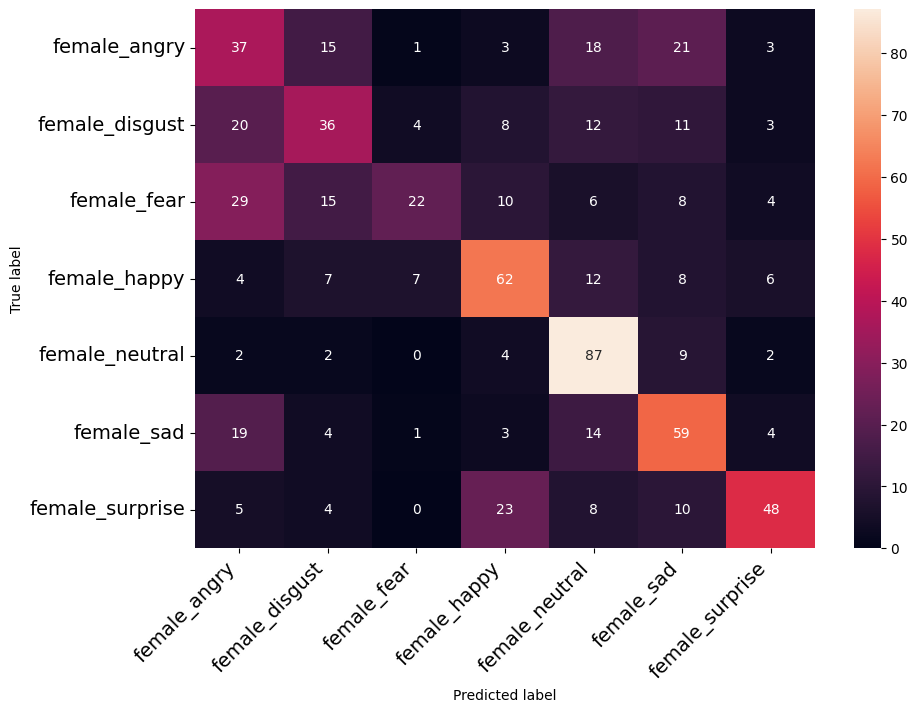

In [48]:
# get prediction file
import seaborn as sns
final_df = pd.read_csv('Predictions.csv')
classes = final_df.actualvalues.unique()
classes.sort()

#confusion matrix
c = confusion_matrix(final_df.actualvalues, final_df.predictedvalues)
print(accuracy_score(final_df.actualvalues, final_df.predictedvalues))
print_confusion_matrix(c, classes)

In [49]:
classes = final_df.actualvalues.unique()
classes.sort()
print(classification_report(final_df.actualvalues, final_df.predictedvalues, target_names = classes))

                 precision    recall  f1-score   support

   female_angry       0.32      0.38      0.35        98
 female_disgust       0.43      0.38      0.41        94
    female_fear       0.63      0.23      0.34        94
   female_happy       0.55      0.58      0.57       106
 female_neutral       0.55      0.82      0.66       106
     female_sad       0.47      0.57      0.51       104
female_surprise       0.69      0.49      0.57        98

       accuracy                           0.50       700
      macro avg       0.52      0.49      0.49       700
   weighted avg       0.52      0.50      0.49       700



# CNN Model

In [63]:
# Baseline model
model = Sequential()
model.add(Conv1D(256, 3, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) # Target class number
model.add(Activation('softmax'))


In [64]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [65]:
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
132/132 [==============================] - 4s 10ms/step - loss: 2.1860 - accuracy: 0.1481 - val_loss: 1.9455 - val_accuracy: 0.1514
Epoch 2/100
132/132 [==============================] - 1s 8ms/step - loss: 2.0417 - accuracy: 0.1710 - val_loss: 1.9423 - val_accuracy: 0.1543
Epoch 3/100
132/132 [==============================] - 1s 9ms/step - loss: 1.9402 - accuracy: 0.2219 - val_loss: 1.9125 - val_accuracy: 0.1943
Epoch 4/100
132/132 [==============================] - 1s 8ms/step - loss: 1.9070 - accuracy: 0.2314 - val_loss: 1.8441 - val_accuracy: 0.2957
Epoch 5/100
132/132 [==============================] - 1s 8ms/step - loss: 1.8801 - accuracy: 0.2429 - val_loss: 1.7779 - val_accuracy: 0.3314
Epoch 6/100
132/132 [==============================] - 1s 10ms/step - loss: 1.8303 - accuracy: 0.2690 - val_loss: 1.7397 - val_accuracy: 0.3643
Epoch 7/100
132/132 [==============================] - 2s 12ms/step - loss: 1.8074 - accuracy: 0.2852 - val_loss: 1.7163 - val_accuracy: 0.3

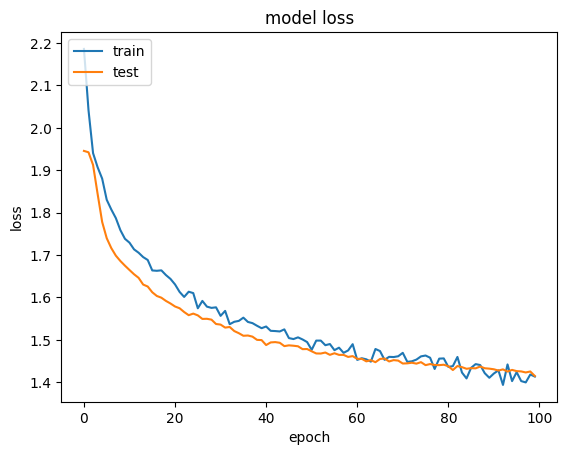

In [66]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LSTM Model

In [77]:
# Define LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [78]:
# Train LSTM model
model.fit(X_train[:, :, np.newaxis], y_train, batch_size=32, epochs=50, validation_data=(X_test[:, :, np.newaxis], y_test))

Epoch 1/50
66/66 [==============================] - 7s 19ms/step - loss: 1.7979 - accuracy: 0.2624 - val_loss: 1.7000 - val_accuracy: 0.3143
Epoch 2/50
66/66 [==============================] - 0s 7ms/step - loss: 1.6595 - accuracy: 0.3324 - val_loss: 1.6328 - val_accuracy: 0.3786
Epoch 3/50
66/66 [==============================] - 1s 8ms/step - loss: 1.6206 - accuracy: 0.3667 - val_loss: 1.5964 - val_accuracy: 0.3729
Epoch 4/50
66/66 [==============================] - 1s 9ms/step - loss: 1.5771 - accuracy: 0.3814 - val_loss: 1.5353 - val_accuracy: 0.4071
Epoch 5/50
66/66 [==============================] - 1s 8ms/step - loss: 1.5436 - accuracy: 0.3952 - val_loss: 1.5161 - val_accuracy: 0.4057
Epoch 6/50
66/66 [==============================] - 1s 9ms/step - loss: 1.5197 - accuracy: 0.4048 - val_loss: 1.4889 - val_accuracy: 0.4214
Epoch 7/50
66/66 [==============================] - 1s 8ms/step - loss: 1.5046 - accuracy: 0.4076 - val_loss: 1.4947 - val_accuracy: 0.4100
Epoch 8/50
66/66 [=

## Model Accuracy for LSTM is 46.14%

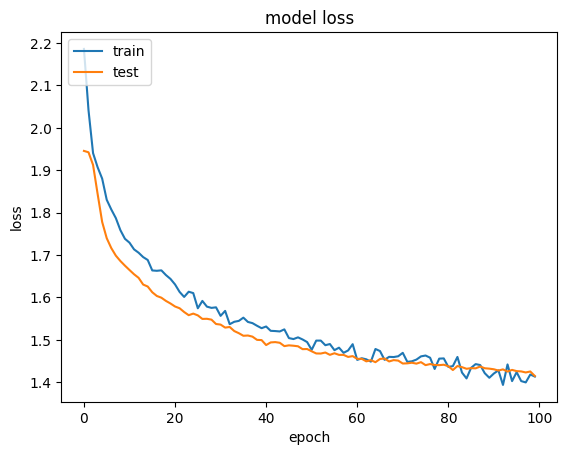

In [79]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

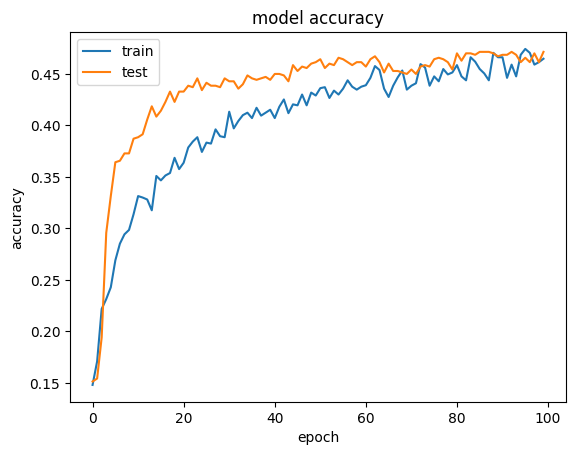

In [80]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# GRU Model

In [85]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.models import Model

# Define input shape
input_shape=(X_train.shape[1], 1)  # (timesteps, features)

# Define GRU model
input_gru = Input(shape=input_shape)
gru = GRU(units=128, return_sequences=True)(input_gru)
gru = GRU(units=64)(gru)
gru = Dropout(0.5)(gru)
output = Dense(units=7, activation='softmax')(gru)

# Create model
model = Model(inputs=input_gru, outputs=output)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# Fit model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test) )

Epoch 1/50
66/66 [==============================] - 1s 13ms/step - loss: 1.3683 - accuracy: 0.4738 - val_loss: 1.3722 - val_accuracy: 0.4700
Epoch 2/50
66/66 [==============================] - 1s 10ms/step - loss: 1.3691 - accuracy: 0.4629 - val_loss: 1.3667 - val_accuracy: 0.4900
Epoch 3/50
66/66 [==============================] - 1s 15ms/step - loss: 1.3531 - accuracy: 0.4757 - val_loss: 1.3635 - val_accuracy: 0.4886
Epoch 4/50
66/66 [==============================] - 1s 8ms/step - loss: 1.3499 - accuracy: 0.4933 - val_loss: 1.3770 - val_accuracy: 0.4729
Epoch 5/50
66/66 [==============================] - 1s 8ms/step - loss: 1.3500 - accuracy: 0.4805 - val_loss: 1.3775 - val_accuracy: 0.4986
Epoch 6/50
66/66 [==============================] - 0s 7ms/step - loss: 1.3559 - accuracy: 0.4890 - val_loss: 1.3673 - val_accuracy: 0.4800
Epoch 7/50
66/66 [==============================] - 0s 7ms/step - loss: 1.3457 - accuracy: 0.4838 - val_loss: 1.3558 - val_accuracy: 0.4814
Epoch 8/50
66/66 

## Model Accuracy for GRU is 49.71%

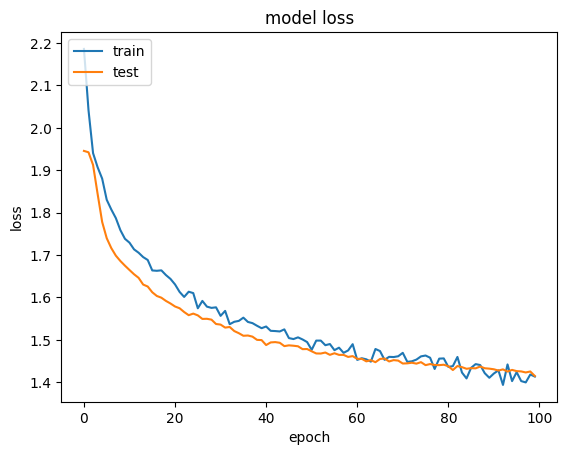

In [88]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# DCNN Model
The input image generated from the audio signal is fed into the pretrained DCNN model for robust utterance-level features extraction. Thereafter, a feature selection technique is applied to carefully determine relevant and pertinent features for the accurate classification of emotion with the chosen classifier at the top layer of the model.

Reference: [Akinpelu, S. & Viriri, S. (n.d.). Robust Feature Selection-Based Speech Emotion Classification Using Deep Transfer Learning](https://www.mdpi.com/2076-3417/12/16/8265)

In [ ]:
import librosa
import librosa.display
import numpy as np
import os
from tqdm import tqdm

# Define paths to output directory
output_dir = '/content/drive/MyDrive/MIS548/MelPectrogram'

# Define parameters for Mel-spectrogram feature extraction
n_mels = 128
hop_length = 256
n_fft = 1024

# Loop over each file path in the list
for filepath in tqdm(TESS_df['path']):
    if filepath.endswith('.wav'):
        # Load audio file
        y, sr = librosa.load(filepath, sr=None, mono=True)

        # Extract Mel-spectrogram feature
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)

        # Convert power to dB
        S_dB = librosa.power_to_db(S, ref=np.max)

        # S_dB = np.expand_dims(S_dB, axis=-1)  # Add extra channel dimension
        # Resize Mel-spectrogram to match input shape of model
        # S_dB = tf.image.resize(S_dB, (128, 128)).numpy()


        # Save Mel-spectrogram feature to file
        filename = os.path.splitext(os.path.basename(filepath))[0] + '.png'
        output_filepath = os.path.join(output_dir, filename)
        librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, hop_length=hop_length)
        plt.savefig(output_filepath)
        plt.clf()


In [ ]:
import os
import pandas as pd

# Define path to directory containing Mel-spectrogram images
img_dir = '/content/drive/MyDrive/MIS548/MelPectrogram'

# Create an empty DataFrame to store the data
dataF = pd.DataFrame(columns=['label', 'path'])

# Loop over each file in the directory
for filename in os.listdir(img_dir):
    if filename.endswith('.png'):
        # Extract label from filename
        #label = filename.split('_')[1] + '_' + filename.split('_')[2].split('.')[0]
        label =  'female_' + filename.split('_')[2].split('.')[0]
        
        # Create full path to image file
        filepath = os.path.join(img_dir, filename)
        
        # Add data to DataFrame
        dataF = dataF.append({'label': label, 'path': filepath}, ignore_index=True)


In [24]:
dataF

,label,path
0,female_fear,/content/drive/MyDrive/MIS548/MelPectrogram/OA...
1,female_fear,/content/drive/MyDrive/MIS548/MelPectrogram/OA...
2,female_fear,/content/drive/MyDrive/MIS548/MelPectrogram/OA...
3,female_fear,/content/drive/MyDrive/MIS548/MelPectrogram/OA...
4,female_fear,/content/drive/MyDrive/MIS548/MelPectrogram/OA...
...,...,...
2795,female_sad,/content/drive/MyDrive/MIS548/MelPectrogram/YA...
2796,female_sad,/content/drive/MyDrive/MIS548/MelPectrogram/YA...
2797,female_sad,/content/drive/MyDrive/MIS548/MelPectrogram/YA...
2798,female_sad,/content/drive/MyDrive/MIS548/MelPectrogram/YA...


In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define the image dimensions and number of classes
img_width = 224
img_height = 224
num_classes = len(dataF['label'].unique())

# Split the data into training and validation sets
train_df, val_df = train_test_split(dataF, test_size=0.2, random_state=42)

# Create data generators for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, x_col='path', y_col='label',
                                                    target_size=(img_width, img_height), batch_size=32,
                                                    class_mode='sparse')

val_generator = val_datagen.flow_from_dataframe(val_df, x_col='path', y_col='label',
                                                target_size=(img_width, img_height), batch_size=32,
                                                class_mode='sparse')

Found 2240 validated image filenames belonging to 7 classes.
Found 560 validated image filenames belonging to 7 classes.


In [47]:
# Define the model
model = Sequential()

# Convolutional layers
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))

# Output layer
model.add(layers.Dense(num_classes, activation='softmax'))


# DCNN Model Summary
The model is a sequential convolutional neural network with five convolutional layers, followed by max-pooling layers, and three fully connected layers. It takes input with shape (None, 224, 224, 3) and outputs a probability distribution over 7 classes. The number of parameters in this model is 19,835,143, all of which are trainable. The model uses a dropout layer with a rate of 0.5 to prevent overfitting.

In [48]:
#let's check summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 256)     295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 512)       1180160   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 512)     

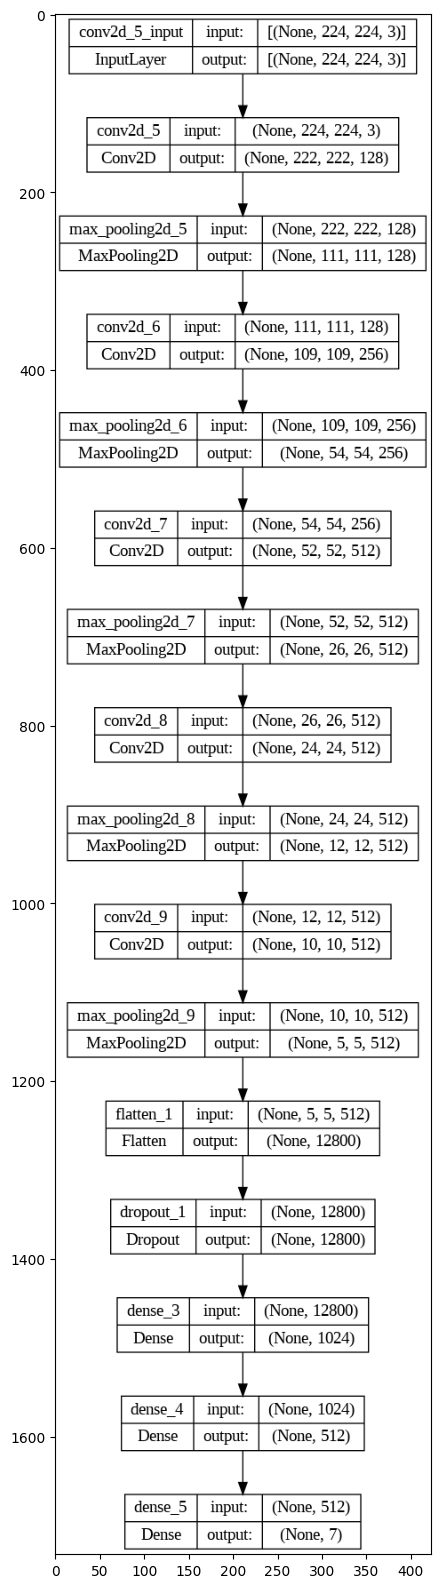

In [38]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# plot the model architecture and save it to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# display the image using matplotlib
img = plt.imread('model_plot.png')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

In [50]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_history= model.fit(train_generator, epochs=20, validation_data=val_generator)


Epoch 1/20
70/70 [==============================] - 56s 761ms/step - loss: 1.9508 - accuracy: 0.1321 - val_loss: 1.9362 - val_accuracy: 0.1357
Epoch 2/20
70/70 [==============================] - 52s 748ms/step - loss: 1.7814 - accuracy: 0.2835 - val_loss: 1.5538 - val_accuracy: 0.3875
Epoch 3/20
70/70 [==============================] - 52s 742ms/step - loss: 1.4130 - accuracy: 0.4429 - val_loss: 1.2130 - val_accuracy: 0.5429
Epoch 4/20
70/70 [==============================] - 52s 746ms/step - loss: 1.2047 - accuracy: 0.5531 - val_loss: 0.9432 - val_accuracy: 0.6661
Epoch 5/20
70/70 [==============================] - 52s 747ms/step - loss: 0.9353 - accuracy: 0.6504 - val_loss: 0.7368 - val_accuracy: 0.7321
Epoch 6/20
70/70 [==============================] - 52s 746ms/step - loss: 0.6886 - accuracy: 0.7563 - val_loss: 0.4783 - val_accuracy: 0.8232
Epoch 7/20
70/70 [==============================] - 52s 745ms/step - loss: 0.5078 - accuracy: 0.8214 - val_loss: 0.2760 - val_accuracy: 0.9107

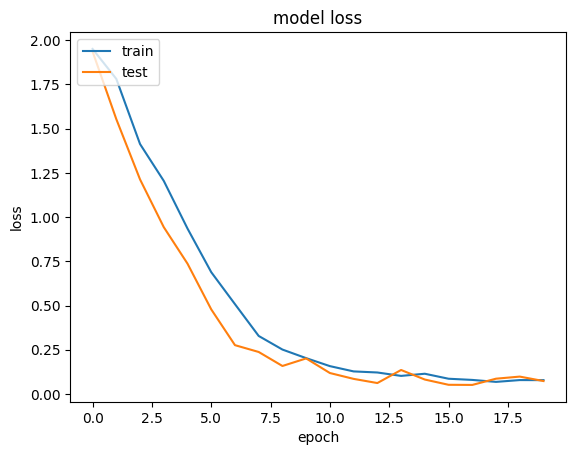

In [51]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

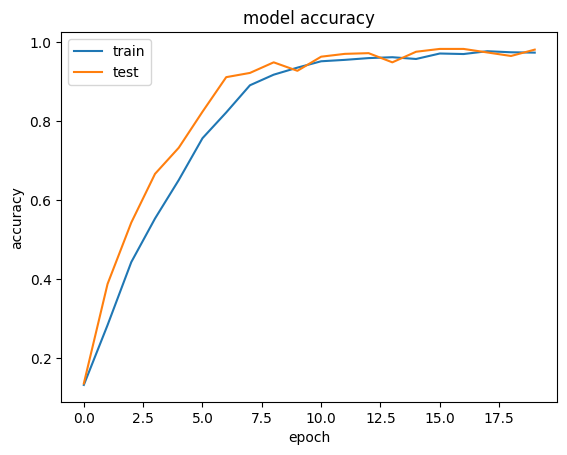

In [52]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Accuracy
98.04%

In [53]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

# Print the accuracy
print("Validation accuracy:", val_accuracy)


18/18 [==============================] - 5s 277ms/step - loss: 0.0731 - accuracy: 0.9804
Validation accuracy: 0.9803571701049805


In [54]:
# save model and weights
model_name = 'emotion_model_dcnn.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models') # creates a folder in current working directory (CWD)

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
model.save(model_path)
print('Save model and weights at %s' % model_path)

model_json = model.to_json()
with open('model_json_dcnn.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/emotion_model_dcnn.h5


In [55]:
from tensorflow.keras.models import model_from_json

# loading json and model architecture
json_file = open('model_json_dcnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/saved_models/emotion_model_dcnn.h5')
print('Model is loaded from disk')

# Compile the model
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Evaluate the model on the validation generator
score = loaded_model.evaluate(val_generator)
print('%s: %.2f%%' % (loaded_model.metrics_names[1], score[1]*100))

Model is loaded from disk
18/18 [==============================] - 6s 291ms/step - loss: 0.0731 - accuracy: 0.9804
accuracy: 98.04%


In [56]:
predicted = loaded_model.predict(train_generator, batch_size = 16, verbose = 1)
predicted = predicted.argmax(axis = 1)
predicted

70/70 [==============================] - 54s 772ms/step


array([6, 6, 4, ..., 4, 1, 5])

18/18 [==============================] - 5s 281ms/step


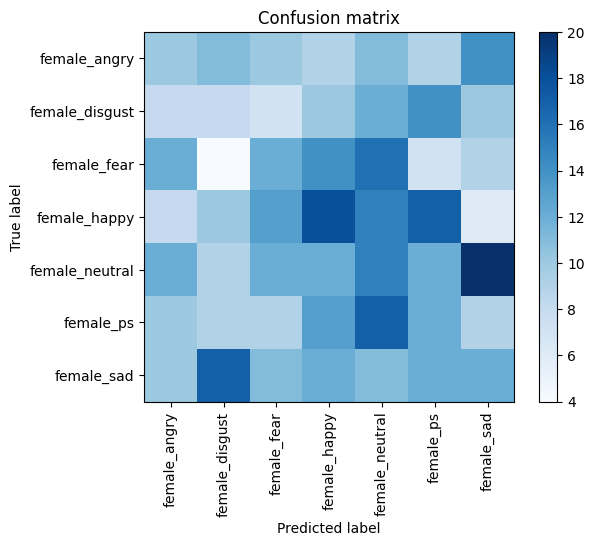

In [58]:
from sklearn.metrics import confusion_matrix

# Get the model predictions for the validation generator
y_pred = loaded_model.predict(val_generator)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true_classes = val_generator.classes

# Get the class names
class_names = list(val_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()